# 0. Project Description
**Reducing Traffic Mortality**<br>
While the rate of fatal road accidents has been decreasing steadily since the 80s, the past ten years have seen a stagnation in this reduction. Coupled with the increase in number of miles driven in the nation, the total number of traffic related-fatalities has now reached a ten year high and is rapidly increasing.<br>
By looking at the demographics of traﬃc accident victims for each US state, we find that there is a lot of variation between states. Now we want to understand if there are patterns in this variation in order to derive suggestions for a policy action plan. In particular, instead of implementing a costly nation-wide plan we want to focus on groups of states with similar profiles. How can we find such groups in a statistically sound way and communicate the result effectively?


# Setting up the environment

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
print("Setup Complete")

Setup Complete


# 1. Read in and get an overview of the data
we will orient ourselves to get to know the data with which we are dealing.

In [77]:
# read the first dataset
road_accidents = pd.read_csv('road-accidents.csv', sep='|', index_col='state')

# merge the second dataset with the first
road_accidents['million_miles_annually'] = pd.read_csv('miles-driven.csv', sep='|', index_col='state')['million_miles_annually']

# add a "state code" column that will be needed later in plotting
road_accidents['state code'] = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv', index_col='state')['code']


# 
road_accidents['million_miles_annually'] = road_accidents['million_miles_annually'].apply(lambda x: x / 1000)

# rename columns for more clarity
road_accidents.rename(columns = {'million_miles_annually':'billion miles driven annually',
                                 'drvr_fatl_col_bmiles':'number of fatal collisions per billion miles(2011)',
                                  'perc_fatl_speed':'% of fatal collisions while Speeding(2009)',
                                    'perc_fatl_alcohol':'% of fatal collisions while Alcohol-Impaired(2011)',
                                 'perc_fatl_1st_time':'% of fatal collisions for the 1st time',
                                }, inplace = True)

# rearrange columns for more clarity
road_accidents = road_accidents[['state code', 'billion miles driven annually'] + [c for c in road_accidents if c not in ['state code', 'billion miles driven annually']]]

# print the first 5 rows of the data
road_accidents.head()

,state code,billion miles driven annually,number of fatal collisions per billion miles(2011),% of fatal collisions while Speeding(2009),% of fatal collisions while Alcohol-Impaired(2011),% of fatal collisions for the 1st time
state,,,,,,
Alabama,AL,64.914,18.8,39,30,80
Alaska,AK,4.593,18.1,41,25,94
Arizona,AZ,59.575,18.6,35,28,96
Arkansas,AR,32.953,22.4,18,26,95
California,CA,320.784,12.0,35,28,89


# 2. Create a textual and a graphical summary of the data
We now have an idea of what the dataset looks like. To further familiarize ourselves with this data, we will calculate summary statistics and produce a graphical overview of the data. The graphical overview is good to get a sense for the distribution of variables within the data and could consist of one histogram per column. It is often a good idea to also explore the pairwise relationship between all columns in the data set by using pairwise scatter plots (sometimes referred to as a "scatterplot matrix").

### Statistical summary of the dataset
this gives very useful information about the dataset, for example the average of the miles driven annually per state is **57.851020 billion miles driven** with an average of **15.790196 fatal collisions per billion miles**

In [78]:
road_accidents.describe()

,billion miles driven annually,number of fatal collisions per billion miles(2011),% of fatal collisions while Speeding(2009),% of fatal collisions while Alcohol-Impaired(2011),% of fatal collisions for the 1st time
count,51.000000,51.000000,51.000000,51.000000,51.00000
mean,57.851020,15.790196,31.725490,30.686275,88.72549
std,59.898414,4.122002,9.633438,5.132213,6.96011
min,3.568000,5.900000,13.000000,16.000000,76.00000
25%,17.450000,12.750000,23.000000,28.000000,83.50000
50%,46.606000,15.600000,34.000000,30.000000,88.00000
75%,71.922500,18.500000,38.000000,33.000000,95.00000
max,320.784000,23.900000,54.000000,44.000000,100.00000


### Scatterplot Matrix
to explore the pairwise relationships between all columns in the dataset

In [109]:
fig = px.scatter_matrix(
        road_accidents,
        dimensions=["number of fatal collisions per billion miles(2011)", 
                "% of fatal collisions while Speeding(2009)", 
                "% of fatal collisions while Alcohol-Impaired(2011)", 
                "% of fatal collisions for the 1st time"],
        labels={"number of fatal collisions per billion miles(2011)":'fatal collisions',
            "% of fatal collisions while Speeding(2009)":'% Speeding',
            "% of fatal collisions while Alcohol-Impaired(2011)":'% Alcohol',
            "% of fatal collisions for the 1st time":'% 1st time'},
        color="state code",
                       )
fig.update_layout(width = 800, height = 800)
fig.show()

### A choropleth map of miles driven annually in the USA

In [71]:
fig = px.choropleth(road_accidents,
                    locations= 'state code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='billion miles driven annually',
                    color_continuous_scale="Viridis_r", 
                    )
fig.show()

### A choropleth map of number of fatal collisions in the USA

In [70]:
fig = px.choropleth(road_accidents,
                    locations= 'state code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='number of fatal collisions per billion miles(2011)',
                    color_continuous_scale="Viridis_r", 
                    )
fig.show()

### A choropleth map of % of fatal collisions while Speeding in the USA

In [69]:
fig = px.choropleth(road_accidents,
                    locations= 'state code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='% of fatal collisions while Speeding(2009)',
                    color_continuous_scale="Viridis_r",
                    range_color=(0, 100)
                    )
fig.show()

### A choropleth map of percentage of fatal collisions while Alcohol-Impaired in the USA 

In [68]:
fig = px.choropleth(road_accidents,
                    locations= 'state code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='% of fatal collisions while Alcohol-Impaired(2011)',
                    color_continuous_scale="Viridis_r",
                    range_color=(0, 100)
                    )
fig.show()

# 3. Quantify the association of features and accidents
We can already see some potentially interesting relationships between the target variable (the number of fatal accidents) and the feature variables (the remaining three columns).<br><br>
To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:<br><br>
**0.2 = weak**<br>
**0.5 = medium**<br>
**0.8 = strong**<br>
**0.9 = very strong**<br>

In [81]:
road_accidents.corr()

,billion miles driven annually,number of fatal collisions per billion miles(2011),% of fatal collisions while Speeding(2009),% of fatal collisions while Alcohol-Impaired(2011),% of fatal collisions for the 1st time
billion miles driven annually,1.000000,-0.077133,-0.043199,-0.034561,-0.128928
number of fatal collisions per billion miles(2011),-0.077133,1.000000,-0.029080,0.199426,-0.017942
% of fatal collisions while Speeding(2009),-0.043199,-0.029080,1.000000,0.286244,0.014066
% of fatal collisions while Alcohol-Impaired(2011),-0.034561,0.199426,0.286244,1.000000,-0.245455
% of fatal collisions for the 1st time,-0.128928,-0.017942,0.014066,-0.245455,1.000000


# 4. Fit a multivariate linear regression
From the correlation table, we see that the amount of fatal accidents is most strongly correlated with alcohol consumption (first row). But in addition, we also see that some of the features are correlated with each other, for instance, speeding and alcohol consumption are positively correlated. We, therefore, want to compute the association of the target with each feature while adjusting for the effect of the remaining features. This can be done using multivariate linear regression.

In [108]:
#list of the independent variables (speed, alcohol, 1st time)
X = road_accidents[['% of fatal collisions while Speeding(2009)',
                    '% of fatal collisions while Alcohol-Impaired(2011)',
                    '% of fatal collisions for the 1st time'
                   ]]

#the dependent variable (target = number of fatal collisions)
y = road_accidents['number of fatal collisions per billion miles(2011)']

#creating the linear regression model
model = linear_model.LinearRegression()
model.fit(X, y)

#results
print('1. Speeding coef :', model.coef_[0])
print('2. Alcohol coef :', model.coef_[1])
print('3. 1st time coef :', model.coef_[2])
print('4. R2 =', round(model.score(X, y, sample_weight=None)*100, 2), '%')

1. Speeding coef : -0.04180041330643907
2. Alcohol coef : 0.1908640359968819
3. 1st time coef : 0.024733005025664
4. R2 = 4.95 %


results explanation :<br>
1. if the percentage of fatal collisions while speeding **increase by 1%** and the other variables are held constant, number of fatal collisions **decreases by 0.041 collisions/billion miles**.<br>
2. if the percentage of fatal collisions while Alcohol **increase by 1%** and the other variables are held constant, number of fatal collisions **increases by 0.19 collisions/billion miles**.<br>
3. if the percentage of fatal collisions while it's the 1st time for the driver **increase by 1%** and the other variables are held constant, number of fatal collisions **increases by 0.024 collisions/billion miles**.<br>
4. 4.95% of the variation in **number of fatal collisions** could be explained by changes in speed and alcohol and the '1st time' factor.

# 5. Perform PCA on standardized data
One way of clustering the data is to use PCA to visualize data in reduced dimensional space where we can try to pick up patterns by eye. PCA uses the absolute variance to calculate the overall variance explained for each principal component, so it is important that the features are on a similar scale (unless we would have a particular reason that one feature should be weighted more).<br>
We'll use the appropriate scaling function to standardize the features to be centered with mean 0 and scaled with standard deviation 1.

In [150]:

features = ['% of fatal collisions while Speeding(2009)',
            '% of fatal collisions while Alcohol-Impaired(2011)',
            '% of fatal collisions for the 1st time']

# Separating out the features
x = road_accidents.loc[:, features].values

# Separating out the target
y = road_accidents.loc[:, ['number of fatal collisions per billion miles(2011)']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

#results
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.4567308  0.33796706]


In [157]:
principal_df.head()

,principal component 1,principal component 2
0,0.884639,0.464211
1,-0.625299,-1.220247
2,-0.671696,-1.027863
3,-1.839546,0.239910
4,-0.211743,-0.256667


# 6. Visualize the first two principal components
The first two principal components enable visualization of the data in two dimensions while capturing a high proportion of the variation (79%) from all three features: speeding, alcohol influence, and first-time accidents. This enables us to use our eyes to try to discern patterns in the data with the goal to find groups of similar states. Although clustering algorithms are becoming increasingly efficient, human pattern recognition is an easily accessible and very efficient method of assessing patterns in data.<br>
We will create a scatter plot of the first principle components and explore how the states cluster together in this visualization

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

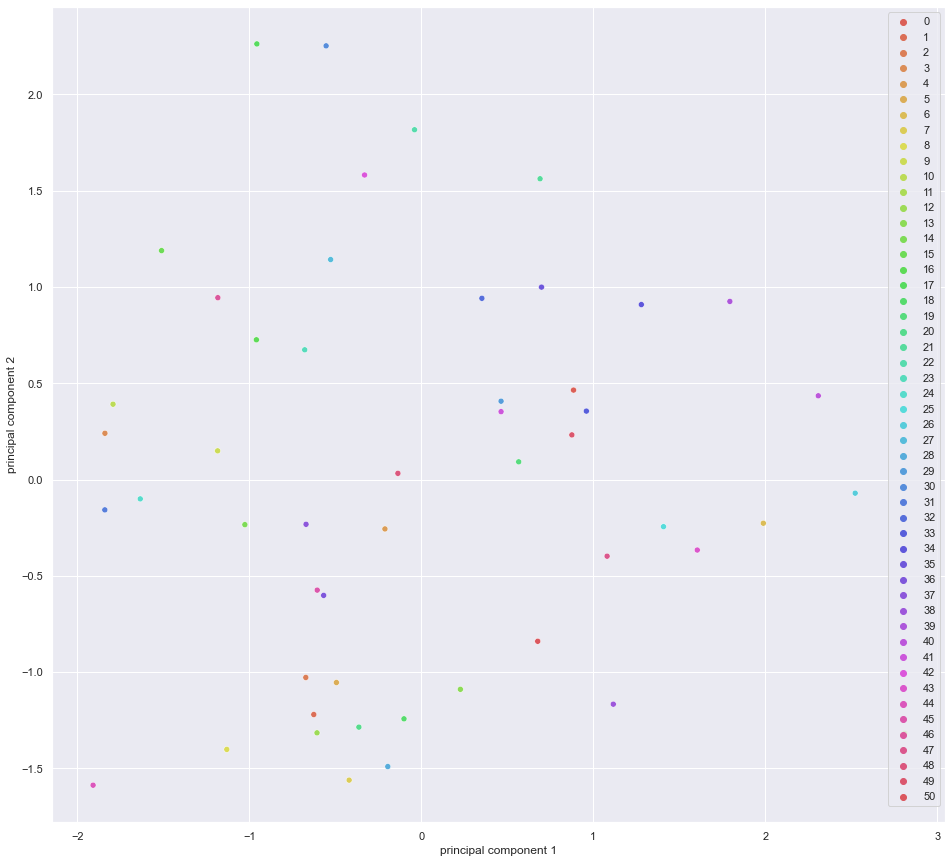

In [178]:
plt.figure(figsize=(16,15))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    data=principal_df,
    hue = principal_df.index,
    palette=sns.color_palette("hls", 51),
)